In [43]:
import pandas as pd
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib as plt

In [5]:
data = pd.read_csv('rossmann_clean.csv')

In [6]:
df = data[['Date', 'Sales']]

In [7]:
df[df.Sales != 0]

,Date,Sales
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102
6,2015-07-25,4364
7,2015-07-24,3706
8,2015-07-23,3769
9,2015-07-22,3464
10,2015-07-21,3558


In [9]:
time = df[:1000]

In [10]:
time.shape

(1000, 2)

In [31]:
df = time.rename(index=str, columns={"Date": "ds", "Sales": "y"})

In [32]:
df.replace(to_replace=0, value=5000, inplace=True)

In [33]:
df.head(5)

,ds,y
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102


In [44]:
df['y'] = np.log(df['y'])
df.set_index('ds').plot()

In [35]:
# Python
m = Prophet()
m.fit(df)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
1085,2015-10-25
1086,2015-10-26
1087,2015-10-27
1088,2015-10-28
1089,2015-10-29


In [37]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1085,2015-10-25,8.464021,8.238575,8.699845
1086,2015-10-26,8.479462,8.244866,8.702165
1087,2015-10-27,8.388099,8.160410,8.608061
1088,2015-10-28,8.376497,8.160115,8.602314
1089,2015-10-29,8.358928,8.133221,8.585115


In [47]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
1085,4741.084748,3784.145472,6001.979898
1086,4814.857504,3808.026618,6015.924520
1087,4394.457011,3499.622319,5475.620263
1088,4343.764379,3498.588554,5444.241522
1089,4268.117080,3405.751109,5351.408580


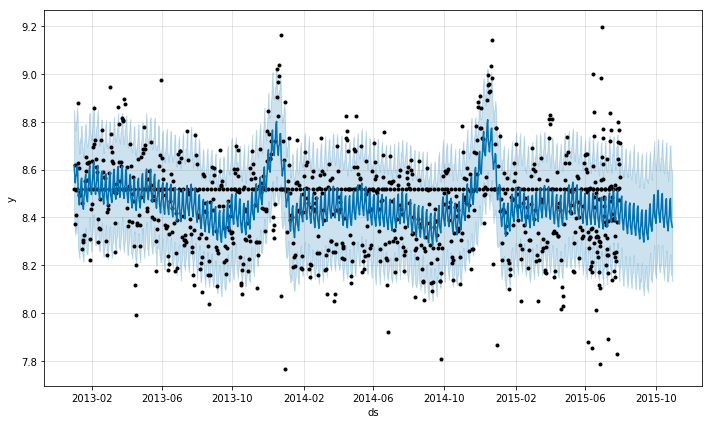

In [38]:
m.plot(forecast)

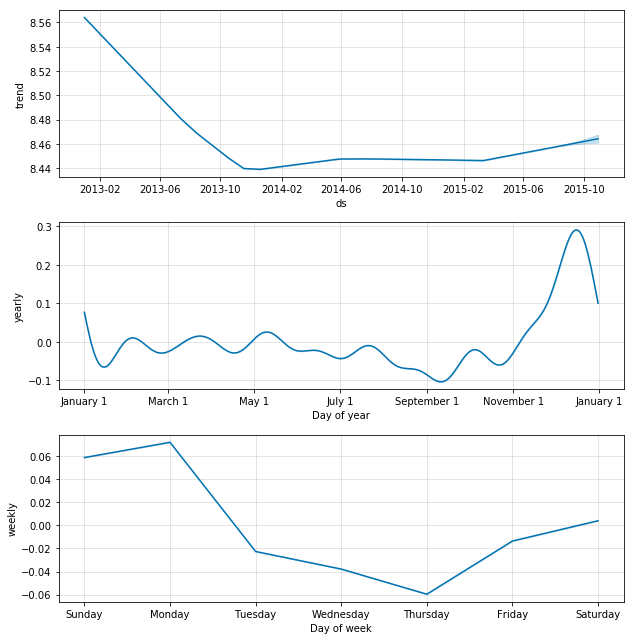

In [39]:
m.plot_components(forecast)

In [68]:
sales = [{'name': 'Jones', 'ds': 150, 'y': 200},
         {'name': 'Jones',  'ds': 200, 'y': 210},
         {'name': 'Jones',  'ds': 50,  'y': 90}]
df = pd.DataFrame(sales)

In [69]:
for index, row in df.iterrows():
    print(row['name'], row['ds'], row['y'])

Jones 150 200
Jones 200 210
Jones 50 90


In [57]:
for index in df.itertuples():
    print(index)

Pandas(Index=0, ds=150, name='Jones LLC', y=200)
Pandas(Index=1, ds=200, name='Alpha Co', y=210)
Pandas(Index=2, ds=50, name='Blue Inc', y=90)


In [61]:
for i in df.items():
    print(i)

('ds', 0    150
1    200
2     50
Name: ds, dtype: int64)
('name', 0    Jones LLC
1     Alpha Co
2     Blue Inc
Name: name, dtype: object)
('y', 0    200
1    210
2     90
Name: y, dtype: int64)


In [65]:
for i in df.iteritems():
    print(i[1])

0    150
1    200
2     50
Name: ds, dtype: int64
0    Jones LLC
1     Alpha Co
2     Blue Inc
Name: name, dtype: object
0    200
1    210
2     90
Name: y, dtype: int64
